In [1]:
import pandas as pd
import numpy as np
import sklearn

In [4]:
# lets get the text data

!pwd

/home/vasim/scikit_learn_data/text


In [3]:
!cd ..

In [6]:
!ls

spam-or-not-spam-dataset.zip  Untitled.ipynb


In [7]:
!unzip spam-or-not-spam-dataset.zip

Archive:  spam-or-not-spam-dataset.zip
  inflating: spam_or_not_spam.csv    


In [8]:
data = pd.read_csv('spam_or_not_spam.csv')

In [17]:
data.columns

Index(['email', 'label'], dtype='object')

In [13]:
data.label.unique()

array([0, 1])

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
email    2999 non-null object
label    3000 non-null int64
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


(array([2500.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         500.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

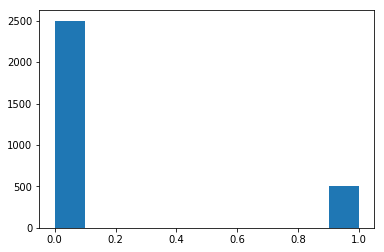

In [32]:
# with respect to our dataset 0 is  ham(not a spam mail) and 1 is spam

plt.hist(data.label)

In [41]:
# b4 doing forther lets divide our dataset by training and testing dataset 

X = data.email
y = data.label

from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=True)

In [65]:
X_train.shape

(2250,)

In [66]:
X_test.shape

(750,)

In [67]:
y_train.shape

(2250,)

In [68]:
# so here X_train,X_test is in object type we cant train an ml if its object so we need to convert in to number

from sklearn.feature_extraction import DictVectorizer

vectorizer = DictVectorizer()

In [70]:
cv = CountVectorizer()

NameError: name 'CountVectorizer' is not defined

In [71]:
dir(sklearn)

['__SKLEARN_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__check_build',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_config',
 'base',
 'clone',
 'config_context',
 'exceptions',
 'externals',
 'feature_extraction',
 'get_config',
 'logger',
 'logging',
 'metrics',
 'model_selection',
 'preprocessing',
 're',
 'set_config',
 'setup_module',
 'show_versions',
 'sys',
 'utils',
 'warnings']

In [105]:
from sklearn.feature_extraction.text import CountVectorizer

In [106]:
vectorizer = CountVectorizer()

In [107]:
vectorizer.fit_transform(X_train)

<2249x30926 sparse matrix of type '<class 'numpy.int64'>'
	with 262391 stored elements in Compressed Sparse Row format>

In [108]:
## error came because there may be null value present

X_train.isna().sum()

0

In [109]:
# there is only one null value lets drop, its will not affect our model much

X_train=X_train.dropna(axis=0)

In [110]:
vectorizer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [111]:
# lets we store the spare matrix to a variable for modeltraiing
X_train_trm = vectorizer.fit_transform(X_train)

In [112]:
# also store the X_test also in spare matrix format for evaluation

X_test_trm = vectorizer.transform(X_test)

## so our prerequirement are done lets start building our model

In [113]:
#  our data is of classification type for handling this type of datasets there are many ml-models namely
# -logisticRegression,Navibias,stochastic Gradientdecent,knn



## working with logisticRegressor

In [114]:
# lets work with order
from sklearn.linear_model import LogisticRegression
logrig = LogisticRegression()

In [115]:
logrig.fit(X_train_trm,y_train[:2249])

/home/vasim/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vasim/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [117]:
x_logrig_pred=logrig.predict(X_test_trm)

In [132]:
# lets check the accuracy

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix

In [134]:
# model accuracy is 84% lets store in variable

log_acc=accuracy_score(x_logrig_pred,y_test)

confusion_matrix(y_test,x_logrig_pred)

array([[605,  13],
       [100,  32]])

## working with naive bias

In [122]:
from sklearn.naive_bayes import MultinomialNB
naivb= MultinomialNB()

In [123]:
naivb.fit(X_train_trm,y_train[:2249])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [124]:
naiv_pre = naivb.predict(X_test_trm)

In [135]:
# naivi bias accuracy is 88% lets store

navi_acc=accuracy_score(naiv_pre,y_test)

confusion_matrix(y_test,naiv_pre)

array([[614,   4],
       [ 81,  51]])

## working with gradient



In [127]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()

In [128]:
sgd.fit(X_train_trm,y_train[:2249])

/home/vasim/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [129]:
sd_pre = sgd.predict(X_test_trm)

In [136]:
# sgd score is 79% lets store in variavble

sgd_acc = accuracy_score(sd_pre,y_test)

confusion_matrix(y_test,sd_pre)

array([[521,  97],
       [ 57,  75]])

## working with Knn



In [137]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [138]:
knn.fit(X_train_trm,y_train[:2249])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [139]:
knn_pre = knn.predict(X_test_trm)

In [141]:
# model accuracy is 84% lets store in variable
knn_acc= accuracy_score(knn_pre,y_test)

In [142]:
confusion_matrix(y_test,knn_pre)

array([[604,  14],
       [101,  31]])

In [144]:
# lets store all accurcy of model in a dict

model_acc={
    'logistic':log_acc,
    'naive bias':navi_acc,
    'gradient': sgd_acc,
    'knn':knn_acc
}

In [165]:
for key in model_acc:
    print(key,model_acc[key])
    

logistic 0.8493333333333334
naive bias 0.8866666666666667
gradient 0.7946666666666666
knn 0.8466666666666667


In [176]:
# lets save all reports

with open('model_accuracy','w+') as f:
    for key in model_acc:
        f.write(f'{key},{model_acc[key]}')
        f.write('\n')
        
    
        